In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
dataset = pd.read_csv('./pima-indians-diabetes.csv')

In [3]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.

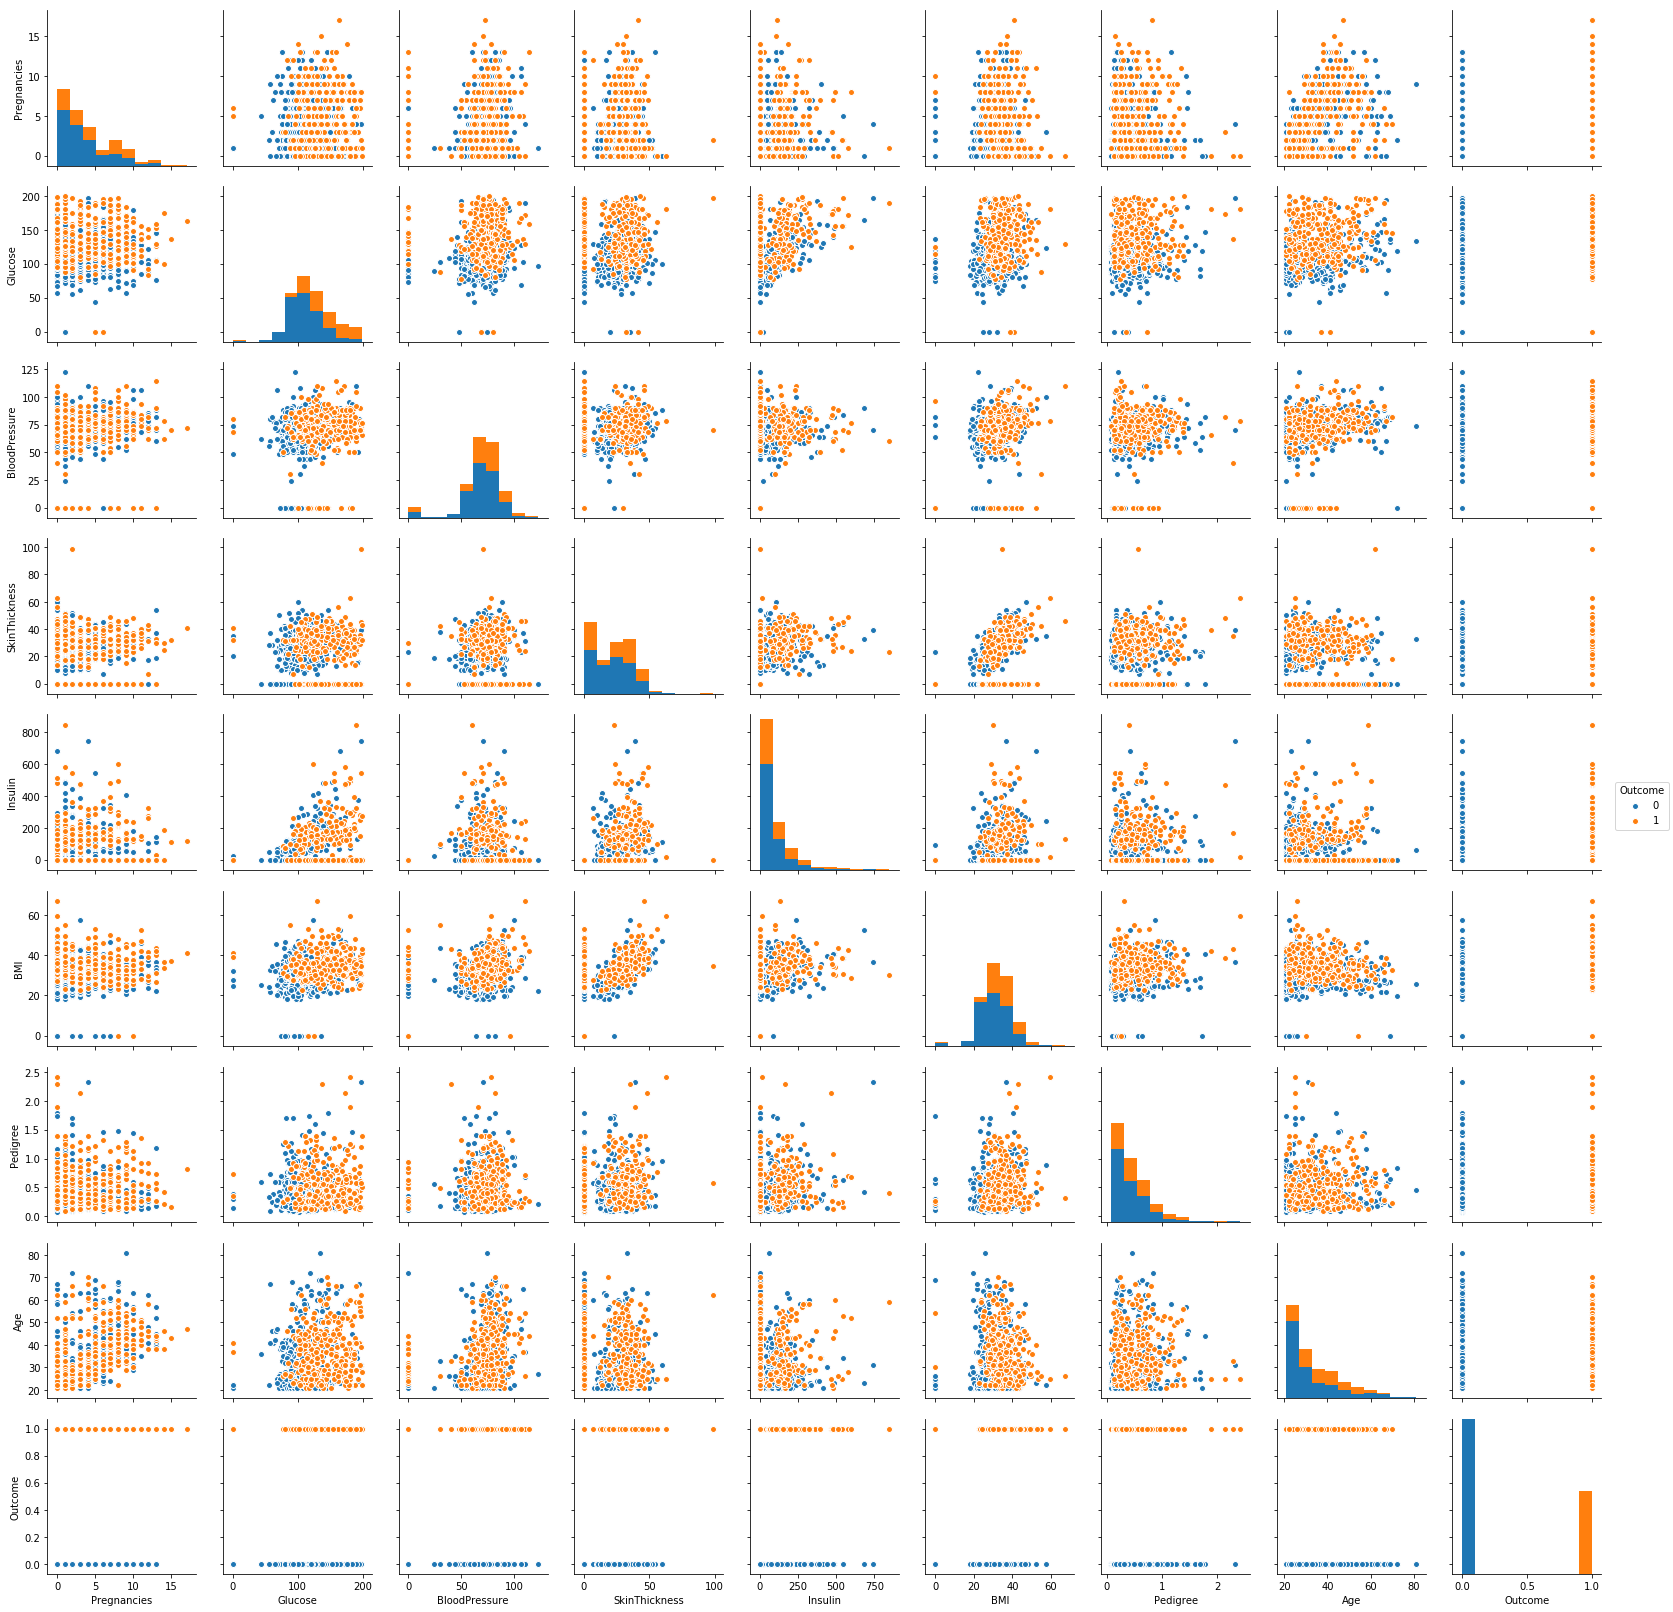

In [4]:
sns.pairplot(data=dataset,hue='Outcome')
plt.show()

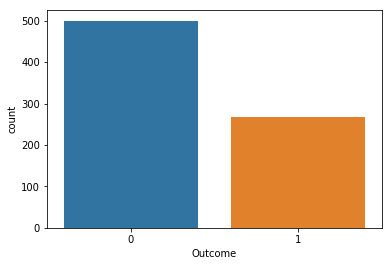

In [5]:
sns.countplot(x='Outcome',data=dataset)
plt.show()

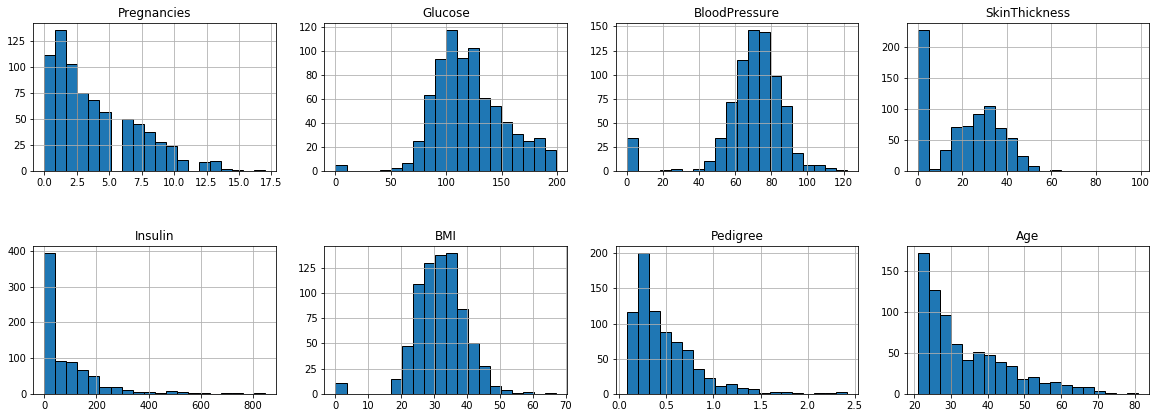

In [9]:
columns=dataset.columns[:8]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),4,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [5]:
print(len(dataset))
print(X.BMI.max())
plt.hist(X.SkinThickness)
plt.show()

768


NameError: name 'X' is not defined

In [ ]:
bins_num = 5
X2 = X.apply(lambda x: x += 1)
print(X2)
bins = X.apply(lambda x: pd.qcut(x, bins_num, duplicates='drop'), axis=0)
# print(X[:10])
# print(bins[:10])

### correlation

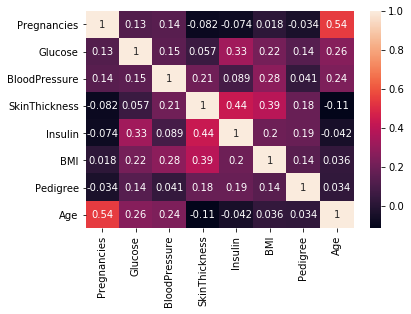

In [11]:
X = dataset.iloc[:, :8]
y = dataset.iloc[:, 8]
sns.heatmap(X.corr(), annot = True)

### Replace Zeroes with the median value of the column

In [ ]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

### Split 80/20

In [33]:
sum = 0
for i in range(10):
    train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.5)
    model = GaussianNB().fit(train_X, train_Y)
    y_pred = model.predict(test_X)
    errors = (test_X.shape[0],(test_Y != y_pred).sum())
    accuracy = 100-errors[1]/errors[0]*100
    sum += accuracy
print(sum/10)

75.33854166666666


### Feature scaling -> removing the mean and scaling to unit variance

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### KFold

In [104]:
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]
folds = 5
train,test=train_test_split(dataset,test_size=1/folds)
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']
model = GaussianNB().fit(train_X, train_Y)
y_pred = model.predict(test_X)
errors = (test_X.shape[0],(test_Y != y_pred).sum())
accuracy = 100-errors[1]/errors[0]*100
print(accuracy)

74.67532467532467


### Stratified KFold

In [135]:
outcome=dataset['Outcome']
data=dataset[dataset.columns[:8]]
folds = 10
train,test=train_test_split(dataset,test_size=1/folds,stratify=dataset['Outcome'])
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']
model = GaussianNB().fit(train_X, train_Y)
y_pred = model.predict(test_X)
errors = (test_X.shape[0],(test_Y != y_pred).sum())
accuracy = 100-errors[1]/errors[0]*100
print(accuracy)

80.51948051948051


### Model = Gaussian Naive Bayes classifier

In [133]:
model = GaussianNB()

### Prediction

In [132]:
y_pred = model.predict(test_X)
errors = (test_X.shape[0],(test_Y != y_pred).sum())
print("Number of mislabeled points out of a total %d points : %d"
      % errors)
print("Accuracy %% : %.2f" % (100-errors[1]/errors[0]*100))

Number of mislabeled points out of a total 77 points : 12
Accuracy % : 84.42


### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
# F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))